In [13]:
!pip install snownlp requests pandas

import requests
import pandas as pd
from snownlp import SnowNLP


In [40]:
API_KEY = "b4a4a5db423056f00eebfb16b5bad557"  # 用你自己的 key

BASE_URL = "https://apis.tianapi.com/social/index"

# 主题字典：英文标签 → 中文关键词（用于 word 参数）
BASE_URL = "https://apis.tianapi.com/social/index"

# 一次性囊括：校园 / 家暴 / 性侵骚扰 / 诈骗 / 交通事故
TOPIC_KEYWORDS = {
    "campus": [
        "校园", "大学生", "中学生", "女生", "男生", "校园暴力"
    ],
    "domestic_violence": [
        "家暴", "家庭暴力", "丈夫殴打", "妻子遭", "前妻", "殴打妻子"
    ],
    "sexual_violence": [
        "性侵", "性骚扰", "猥亵", "女生遭性侵", "老师性骚扰", "辅导员性侵"
    ],
    "fraud": [
        "电信诈骗", "网络诈骗", "裸聊", "刷单被骗", "养老诈骗"
    ],
    "traffic_accident": [
        "交通事故", "车祸", "肇事司机", "女司机", "男司机",'司机'
    ],
}


In [41]:
def fetch_news_for_keyword(keyword, num=30):
    """
    用天行社会新闻接口按 keyword 抓 num 条新闻，返回 DataFrame
    """
    params = {
        "key": API_KEY,
        "num": num,
        "word": keyword,
    }
    resp = requests.get(BASE_URL, params=params, timeout=10)
    resp.raise_for_status()
    data = resp.json()

    newslist = data.get("newslist") or data.get("result", {}).get("newslist")
    if newslist is None:
        print("结构异常：", data)
        return pd.DataFrame()

    df_kw = pd.DataFrame(newslist)
    df_kw["keyword"] = keyword
    return df_kw


In [53]:
all_dfs = []

for topic, kw_list in TOPIC_KEYWORDS.items():
    for kw in kw_list:
        print(f"抓取主题 {topic}（关键词：{kw}）")
        df_kw = fetch_news_for_keyword(kw, num=100)  # 可以调大/调小
        if df_kw.empty:
            continue
        df_kw["topic"] = topic
        all_dfs.append(df_kw)

df = pd.concat(all_dfs, ignore_index=True)

# 去重：同一条新闻可能被多个关键词抓到，这里按 title 去重即可
df = df.drop_duplicates(subset=["title"]).reset_index(drop=True)

print(df.shape)
df[["topic", "keyword", "ctime", "title"]].head(10)


抓取主题 campus（关键词：校园）
抓取主题 campus（关键词：大学生）
抓取主题 campus（关键词：中学生）
抓取主题 campus（关键词：女生）
抓取主题 campus（关键词：男生）
抓取主题 campus（关键词：校园暴力）
结构异常： {'code': 250, 'msg': '数据返回为空'}
抓取主题 domestic_violence（关键词：家暴）
抓取主题 domestic_violence（关键词：家庭暴力）
抓取主题 domestic_violence（关键词：丈夫殴打）
抓取主题 domestic_violence（关键词：妻子遭）
抓取主题 domestic_violence（关键词：前妻）
抓取主题 domestic_violence（关键词：殴打妻子）
抓取主题 sexual_violence（关键词：性侵）
抓取主题 sexual_violence（关键词：性骚扰）
抓取主题 sexual_violence（关键词：猥亵）
抓取主题 sexual_violence（关键词：女生遭性侵）
结构异常： {'code': 250, 'msg': '数据返回为空'}
抓取主题 sexual_violence（关键词：老师性骚扰）
结构异常： {'code': 250, 'msg': '数据返回为空'}
抓取主题 sexual_violence（关键词：辅导员性侵）
结构异常： {'code': 250, 'msg': '数据返回为空'}
抓取主题 fraud（关键词：电信诈骗）
抓取主题 fraud（关键词：网络诈骗）
抓取主题 fraud（关键词：裸聊）
结构异常： {'code': 250, 'msg': '数据返回为空'}
抓取主题 fraud（关键词：刷单被骗）
结构异常： {'code': 250, 'msg': '数据返回为空'}
抓取主题 fraud（关键词：养老诈骗）
结构异常： {'code': 250, 'msg': '数据返回为空'}
抓取主题 traffic_accident（关键词：交通事故）
抓取主题 traffic_accident（关键词：车祸）
抓取主题 traffic_accident（关键词：肇事司机）
抓取主题 traffic_accident（关键词：女司机）
抓取主题 traffic

,topic,keyword,ctime,title
0,campus,校园,2025-11-04 15:05,校园食堂卖999元“帝王蟹”？南京大学回应：已对现有菜式进行调整
1,campus,校园,2025-07-24 07:35,校园配餐服务新国标适用哪些企业？有哪些新要求？
2,campus,校园,2021-04-03 00:00,校园宿舍内疑似发生欺凌事件，近十人围观无人制止
3,campus,校园,2020-07-22 10:59,校园性侵案件书记、校长隐瞒不报被追责，系上海首例
4,campus,校园,2019-08-06 15:01,校园贷死灰复燃 校园贷为何屡禁不止？
5,campus,校园,2019-04-28 10:26,校园黑社会把女孩打成天线宝宝？当地警方发布通报
6,campus,校园,2017-05-16 10:30,校园股神跌落神坛：教授靠内幕炒股赚千万获刑
7,campus,校园,2017-05-08 11:05,校园微商给大学生挖坑：忽悠做代理 监管不明确
8,campus,校园,2017-04-25 07:50,校园贷“高息放贷”内幕：以各种甜头吸引学生
9,campus,校园,2017-04-24 15:42,校园贷多从急缺钱开始 超三成大学生曾入不敷出


In [43]:
df["ctime"] = pd.to_datetime(df["ctime"], errors="coerce")


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           105 non-null    object
 1   ctime        105 non-null    object
 2   title        105 non-null    object
 3   description  105 non-null    object
 4   source       105 non-null    object
 5   picUrl       105 non-null    object
 6   url          105 non-null    object
 7   keyword      105 non-null    object
 8   topic        105 non-null    object
dtypes: object(9)
memory usage: 7.5+ KB


In [44]:
female_terms = [
    "女子","女人","女孩","女性","姑娘","少妇","女士","女童","女婴",
    "妈妈","母亲","妻子","前妻","新娘","女友","女生","阿姨","奶奶","婆婆",
    "女司机","女教师","女学生","女记者","女老板",'女','妈','妇'
]

male_terms = [
    "男子","男人","男孩","男性","小伙","小伙子","男童","男婴",
    "爸爸","父亲","丈夫","前夫","新郎","男友","男生","大爷","老汉",
    "男司机","男教师","男学生","男记者","男老板",'男','爸','父亲'
]

def detect_gender_marking(title: str) -> str:
    if not isinstance(title, str):
        return "Unmarked"
    f = any(t in title for t in female_terms)
    m = any(t in title for t in male_terms)
    if f and not m:
        return "F-marked"
    elif m and not f:
        return "M-marked"
    elif f and m:
        return "Both"
    else:
        return "Unmarked"

df["gender_marking"] = df["title"].astype(str).apply(detect_gender_marking)
df["gender_marking"].value_counts(), df[["topic", "title", "gender_marking"]].head(10)


(gender_marking
 Unmarked    104
 F-marked     66
 Both         27
 M-marked     24
 Name: count, dtype: int64,
     topic                             title gender_marking
 0  campus  校园食堂卖999元“帝王蟹”？南京大学回应：已对现有菜式进行调整       Unmarked
 1  campus           校园配餐服务新国标适用哪些企业？有哪些新要求？       Unmarked
 2  campus           校园宿舍内疑似发生欺凌事件，近十人围观无人制止       Unmarked
 3  campus          校园性侵案件书记、校长隐瞒不报被追责，系上海首例       Unmarked
 4  campus                校园贷死灰复燃 校园贷为何屡禁不止？       Unmarked
 5  campus           校园黑社会把女孩打成天线宝宝？当地警方发布通报       F-marked
 6  campus             校园股神跌落神坛：教授靠内幕炒股赚千万获刑       Unmarked
 7  campus            校园微商给大学生挖坑：忽悠做代理 监管不明确       Unmarked
 8  campus             校园贷“高息放贷”内幕：以各种甜头吸引学生       Unmarked
 9  campus            校园贷多从急缺钱开始 超三成大学生曾入不敷出       Unmarked)

In [45]:
df_use = df[df["gender_marking"].isin(["F-marked", "M-marked", "Unmarked"])].copy()

# 每个主题总数
topic_total = (
    df_use.groupby("topic")
          .size()
          .reset_index(name="total")
)

# 每个主题 × 性别标记 数量
topic_counts = (
    df_use.groupby(["topic", "gender_marking"])
          .size()
          .reset_index(name="count")
)

# 合并、算占比
topic_stats = topic_counts.merge(topic_total, on="topic")
topic_stats["proportion"] = topic_stats["count"] / topic_stats["total"]

topic_stats.head()


,topic,gender_marking,count,total,proportion
0,campus,F-marked,28,111,0.252252
1,campus,M-marked,21,111,0.189189
2,campus,Unmarked,62,111,0.558559
3,domestic_violence,F-marked,3,4,0.750000
4,domestic_violence,Unmarked,1,4,0.250000


<Figure size 900x400 with 0 Axes>

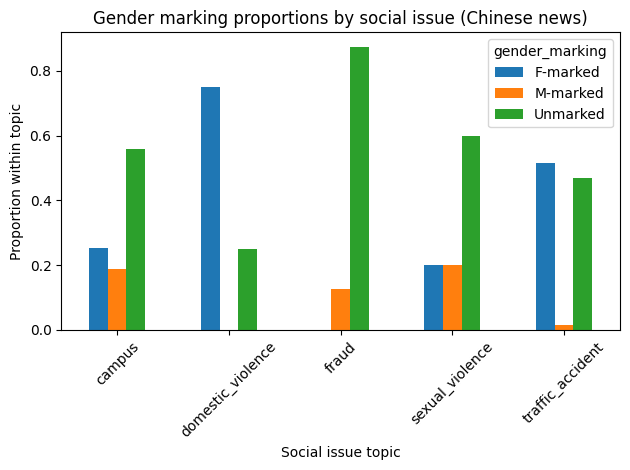

In [46]:
pivot_prop = topic_stats.pivot(index="topic",
                               columns="gender_marking",
                               values="proportion")

plt.figure(figsize=(9,4))
pivot_prop.plot(kind="bar", rot=45)
plt.ylabel("Proportion within topic")
plt.xlabel("Social issue topic")
plt.title("Gender marking proportions by social issue (Chinese news)")
plt.legend(title="gender_marking")
plt.tight_layout()
plt.show()


In [47]:
from snownlp import SnowNLP

def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return None
    return SnowNLP(text).sentiments   # 0~1，越大越正面

# 对所有新闻标题算情绪
df["sentiment"] = df["title"].astype(str).apply(get_sentiment)

# 看一下整体分布
df["sentiment"].describe()
df[["topic", "gender_marking", "title", "sentiment"]].head()


,topic,gender_marking,title,sentiment
0,campus,Unmarked,校园食堂卖999元“帝王蟹”？南京大学回应：已对现有菜式进行调整,0.986113
1,campus,Unmarked,校园配餐服务新国标适用哪些企业？有哪些新要求？,0.967448
2,campus,Unmarked,校园宿舍内疑似发生欺凌事件，近十人围观无人制止,0.940206
3,campus,Unmarked,校园性侵案件书记、校长隐瞒不报被追责，系上海首例,0.990492
4,campus,Unmarked,校园贷死灰复燃 校园贷为何屡禁不止？,0.996519


In [48]:
# 只保留 F / M / Unmarked 三类
df_sent = df[df["gender_marking"].isin(["F-marked", "M-marked", "Unmarked"])].copy()

sent_by_topic_gender = (
    df_sent
      .groupby(["topic", "gender_marking"])["sentiment"]
      .mean()
      .reset_index()
)

sent_by_topic_gender.head()


,topic,gender_marking,sentiment
0,campus,F-marked,0.640721
1,campus,M-marked,0.610260
2,campus,Unmarked,0.657943
3,domestic_violence,F-marked,0.750080
4,domestic_violence,Unmarked,0.955434


<Figure size 900x400 with 0 Axes>

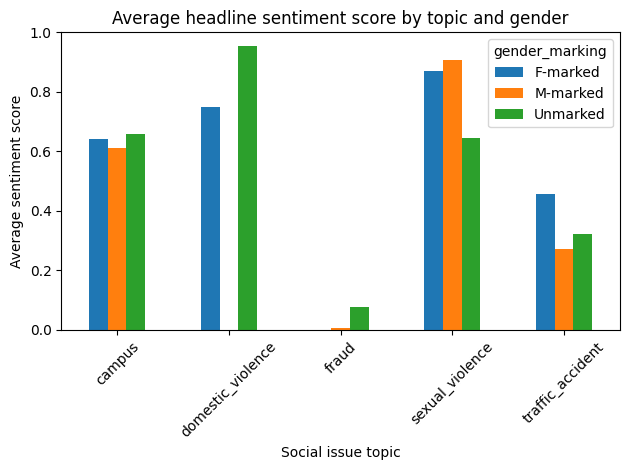

In [56]:
pivot_sent = sent_by_topic_gender.pivot(
    index="topic",
    columns="gender_marking",
    values="sentiment"
)

plt.figure(figsize=(9,4))
pivot_sent.plot(kind="bar", rot=45)
plt.ylabel("Average sentiment score")
plt.xlabel("Social issue topic")
plt.title("Average headline sentiment score by topic and gender")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
